In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

%matplotlib inline

# Get Data

In [3]:
plt.style.use('ggplot')

In [4]:
f = r'C:\Users\mattk\code\Mkt_Data\all_futures.csv'
df = pd.read_csv(f,index_col=0,parse_dates=[0])
df = df.resample('1B').last()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13112 entries, 1970-03-30 to 2020-06-30
Freq: B
Data columns (total 38 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AEX      2790 non-null   float64
 1   AUD      8423 non-null   float64
 2   BOBL     3191 non-null   float64
 3   BTP      2680 non-null   float64
 4   BUND     3513 non-null   float64
 5   CAC      2877 non-null   float64
 6   COPPER   6331 non-null   float64
 7   CORN     12248 non-null  float64
 8   CRUDE_W  7868 non-null   float64
 9   EDOLLAR  9262 non-null   float64
 10  EUR      5328 non-null   float64
 11  EUROSTX  1566 non-null   float64
 12  GAS_US   7560 non-null   float64
 13  GBP      11327 non-null  float64
 14  GOLD     11411 non-null  float64
 15  JPY      10932 non-null  float64
 16  KOSPI    1532 non-null   float64
 17  KR10     1520 non-null   float64
 18  KR3      1515 non-null   float64
 19  LEANHOG  11856 non-null  float64
 20  LIVECOW  12537 non-null  

In [5]:
assets = ['COPPER', 'CORN', 'CRUDE_W',
       'EUR', 'GBP', 'GOLD', 'JPY',
       'LEANHOG', 'LIVECOW', 'MXP',
       'PALLAD', 'PLAT', 'SOYBEAN', 'SP500', 'US10', 'WHEAT']

In [6]:
df2 = df[assets].loc['1/1/2000':'1/1/2020']

In [7]:
df2.head()

,COPPER,CORN,CRUDE_W,EUR,GBP,GOLD,JPY,LEANHOG,LIVECOW,MXP,PALLAD,PLAT,SOYBEAN,SP500,US10,WHEAT
DATETIME,,,,,,,,,,,,,,,,
2000-01-03,NaN,592.25,NaN,1.19005,1.5057,NaN,0.013691,61.83,110.925,0.024255,NaN,NaN,33.25,1504.375,36.265615,888.25
2000-01-04,1.2060,593.25,12.34,1.19235,1.5035,649.2,0.013518,61.68,110.825,0.022555,574.3,561.0,39.25,1449.375,36.742177,887.00
2000-01-05,1.2145,593.75,12.02,1.19405,1.5083,647.6,0.013410,61.36,110.995,0.022975,570.5,549.2,45.50,1451.375,36.062490,891.00
2000-01-06,1.2110,594.75,11.95,1.19205,1.5139,647.9,0.013305,62.06,111.525,0.022605,567.7,541.3,44.75,1441.375,36.390615,890.50
2000-01-07,1.2120,597.50,12.03,1.19035,1.5049,648.4,0.013323,62.83,112.025,0.023225,576.3,543.3,48.75,1498.375,36.765615,893.25


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5218 entries, 2000-01-03 to 2020-01-01
Freq: B
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   COPPER   4990 non-null   float64
 1   CORN     5022 non-null   float64
 2   CRUDE_W  4939 non-null   float64
 3   EUR      5008 non-null   float64
 4   GBP      5067 non-null   float64
 5   GOLD     5017 non-null   float64
 6   JPY      5049 non-null   float64
 7   LEANHOG  5012 non-null   float64
 8   LIVECOW  5013 non-null   float64
 9   MXP      5028 non-null   float64
 10  PALLAD   5024 non-null   float64
 11  PLAT     5062 non-null   float64
 12  SOYBEAN  4934 non-null   float64
 13  SP500    5019 non-null   float64
 14  US10     5030 non-null   float64
 15  WHEAT    5024 non-null   float64
dtypes: float64(16)
memory usage: 693.0 KB


In [9]:
df3 = df2.fillna(method='ffill')
df3 = df3.diff().dropna()
tgt_vol = .15/np.sqrt(252)
df3 = (df3*tgt_vol/df3.ewm(span=25).std()).dropna()

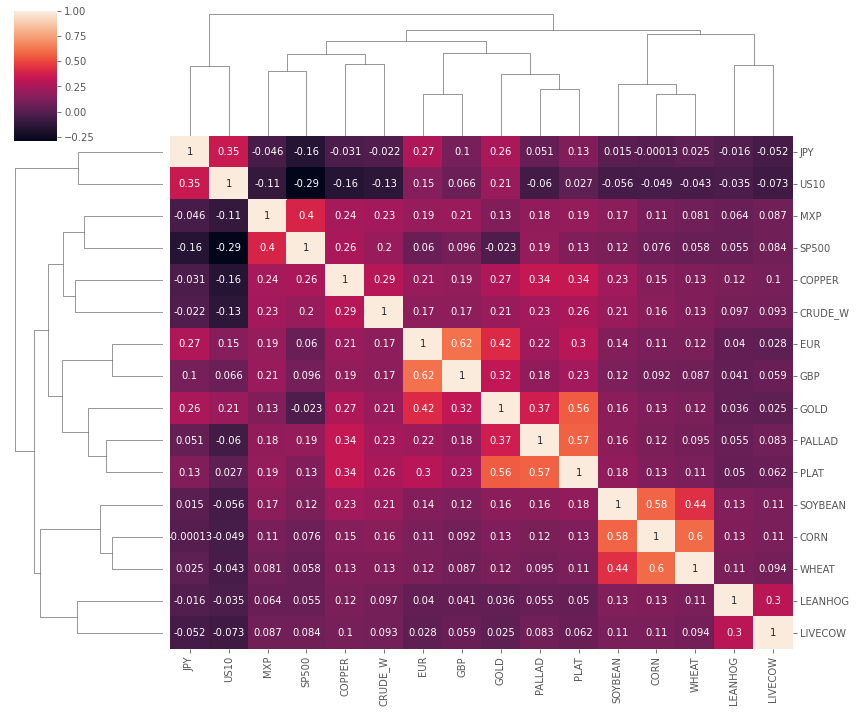

In [10]:
sns.clustermap(df3.corr(),figsize=(12, 10),annot = True)

In [11]:
np.sqrt(252)*df3.describe().T

,count,mean,std,min,25%,50%,75%,max
COPPER,82785.558523,0.002450,0.143950,-0.497315,-0.088458,0.000000,0.094465,0.474836
CORN,82785.558523,-0.001083,0.143293,-0.497653,-0.094573,0.000000,0.089390,0.494567
CRUDE_W,82785.558523,0.005763,0.144402,-0.483750,-0.084990,0.000000,0.100842,0.471782
EUR,82785.558523,0.000530,0.144293,-0.521266,-0.095787,0.000000,0.092838,0.468212
GBP,82785.558523,0.000820,0.145700,-0.504977,-0.093762,0.000000,0.096348,1.484924
GOLD,82785.558523,0.005921,0.142983,-0.502321,-0.080420,0.000000,0.096179,0.528765
JPY,82785.558523,-0.004533,0.175916,-7.424621,-0.096532,0.000000,0.085947,0.505874
LEANHOG,82785.558523,0.003329,0.144687,-0.456495,-0.085610,0.000000,0.096401,0.500551
LIVECOW,82785.558523,0.001103,0.144538,-0.476290,-0.089147,0.000000,0.095275,0.459826
MXP,82785.558523,0.003642,0.143863,-0.500947,-0.087993,0.000000,0.099925,0.489864


# Long Only

In [12]:
# long only
print('Long Only')
print('Return: {}'.format(df3.mean(axis=1).mean()*252))
print('Std: {}'.format(df3.mean(axis=1).std()*np.sqrt(252)))
print('Sharpe: {}'.format(df3.mean(axis=1).mean()*np.sqrt(252)/df3.mean(axis=1).std()))

Long Only
Return: 0.043644630227202046
Std: 0.06396831386608431
Sharpe: 0.6822851438380998


In [13]:
print('Best Possible Sharpe: {}'.format(df3.abs().mean(axis=1).mean()*np.sqrt(252)/df3.mean(axis=1).std()))

Best Possible Sharpe: 27.861282221959335


In [14]:
def plot_hists2(arr):
    fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(20,16))

    ax[0,0].hist(np.mean(arr,axis=0)*252,bins=50)
    ax[0,0].set_title('Annualized % Returns');

    ax[0,1].hist(np.std(arr,axis=0)*np.sqrt(252),bins=50)
    ax[0,1].set_title('Annualized % Vol');

    ax[1,0].hist(np.mean(arr,axis=0)*np.sqrt(252)/np.std(arr,axis=0),bins=50)
    ax[1,0].set_title('Annualized Sharpe');
    
    ax[1,1].scatter(np.std(arr,axis=0)*np.sqrt(252),np.mean(arr,axis=0)*np.sqrt(252)/np.std(arr,axis=0),alpha=.7)
    ax[1,1].set_title('Sharpe vs. Std.')
    ax[1,1].set_xlabel('Std.')
    ax[1,1].set_ylabel('Sharpe');
    
    return
    

# Random Days, Random Wts [-1,1]

In [35]:
# choose 1,000 random days with replacement 
# simulate 10,000 wt combos [-1,1] for each asset each day

choice = np.random.choice(range(len(df3)),2000)
days = df3.iloc[choice,:].to_numpy()
pos = np.random.uniform(-1,1,size=(df3.shape[1],10000))
d_ret = (days.dot(pos))/days.shape[1]



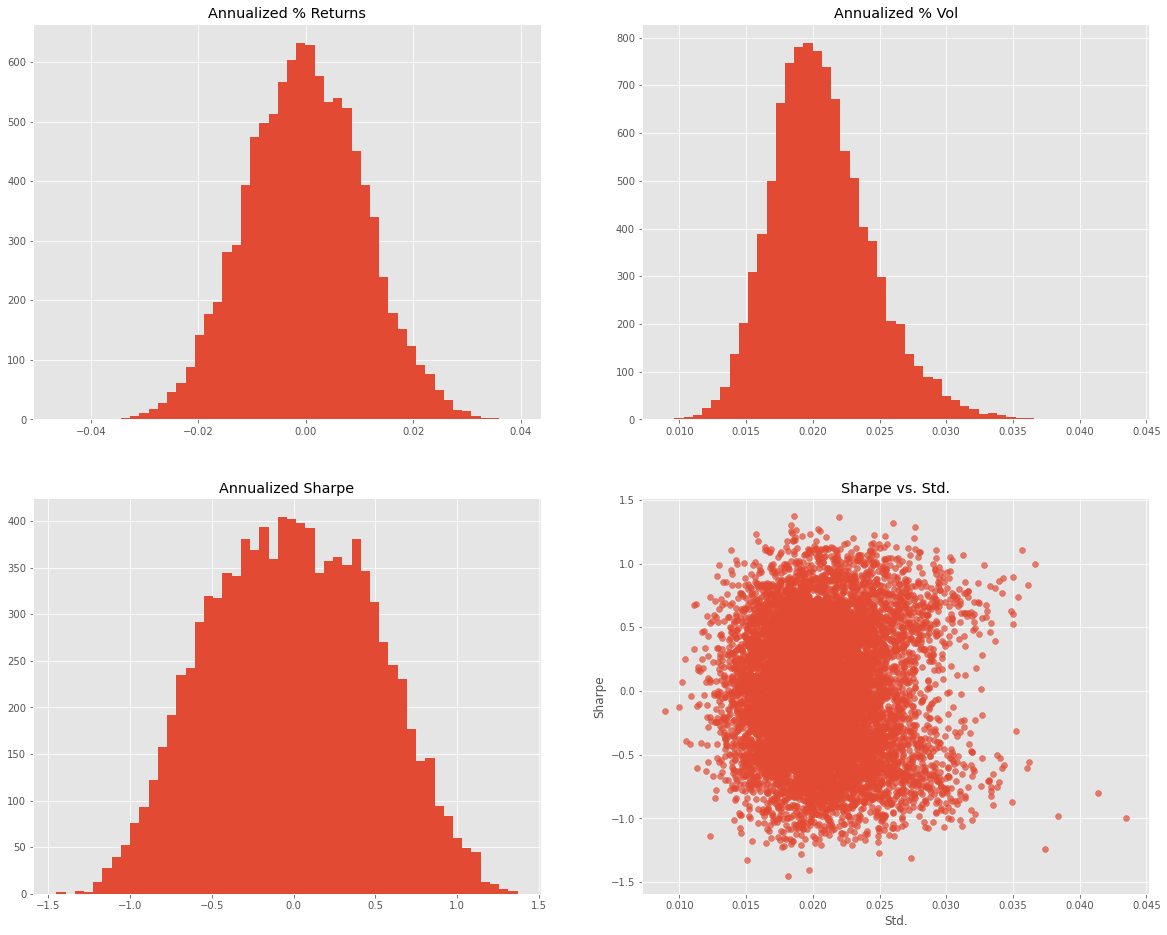

In [36]:
plot_hists2(d_ret)

(array([  2.,   0.,   3.,   5.,  18.,  30.,  52.,  54.,  88., 116., 142.,
        197., 223., 249., 293., 326., 323., 367., 345., 379., 379., 410.,
        366., 413., 411., 401., 396., 351., 352., 357., 358., 392., 347.,
        288., 277., 238., 210., 190., 135., 140., 103.,  76.,  64.,  51.,
         45.,  17.,  10.,   7.,   2.,   2.]),
 array([-2.40224181, -2.30497939, -2.20771697, -2.11045455, -2.01319213,
        -1.91592971, -1.81866729, -1.72140487, -1.62414245, -1.52688003,
        -1.42961761, -1.33235519, -1.23509277, -1.13783035, -1.04056793,
        -0.94330551, -0.84604309, -0.74878067, -0.65151825, -0.55425583,
        -0.45699341, -0.35973099, -0.26246857, -0.16520615, -0.06794373,
         0.02931869,  0.12658111,  0.22384353,  0.32110595,  0.41836837,
         0.51563079,  0.61289321,  0.71015563,  0.80741805,  0.90468047,
         1.00194289,  1.09920531,  1.19646773,  1.29373015,  1.39099257,
         1.48825499,  1.58551741,  1.68277983,  1.78004225,  1.87730467,
 

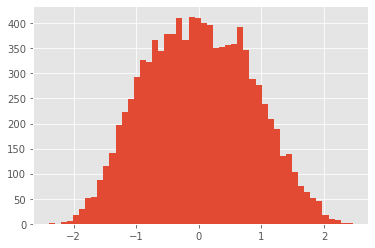

In [37]:
plt.hist(np.mean(d_ret,axis=0)*np.sqrt(252)/np.std(np.minimum(d_ret,np.zeros_like(d_ret)),axis=0),bins=50)

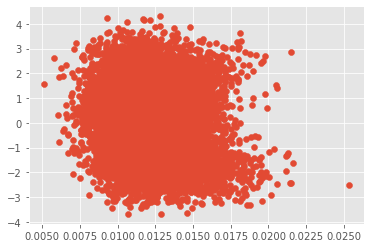

In [34]:
plt.scatter(np.std(np.minimum(d_ret,np.zeros_like(d_ret)),axis=0)*np.sqrt(252),np.mean(d_ret,axis=0)*np.sqrt(252)/np.std(np.minimum(d_ret,np.zeros_like(d_ret)),axis=0))

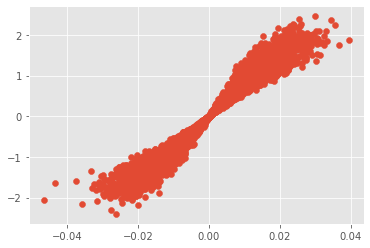

In [40]:
plt.scatter(np.mean(d_ret,axis=0)*252,np.mean(d_ret,axis=0)*np.sqrt(252)/np.std(np.minimum(d_ret,np.zeros_like(d_ret)),axis=0))

# Random Days, Random Wts Binary -1 or 1

In [567]:
# choose 1,000 random days with replacement 
# simulate 10,000 wt combos binary -1 or 1 for each asset each day

choice = np.random.choice(range(len(df3)),1000)
days = df3.iloc[choice,:].to_numpy()
pos = np.random.choice([-1,1],size=(df3.shape[1],10000))
d_ret = (days.dot(pos))/days.shape[1]

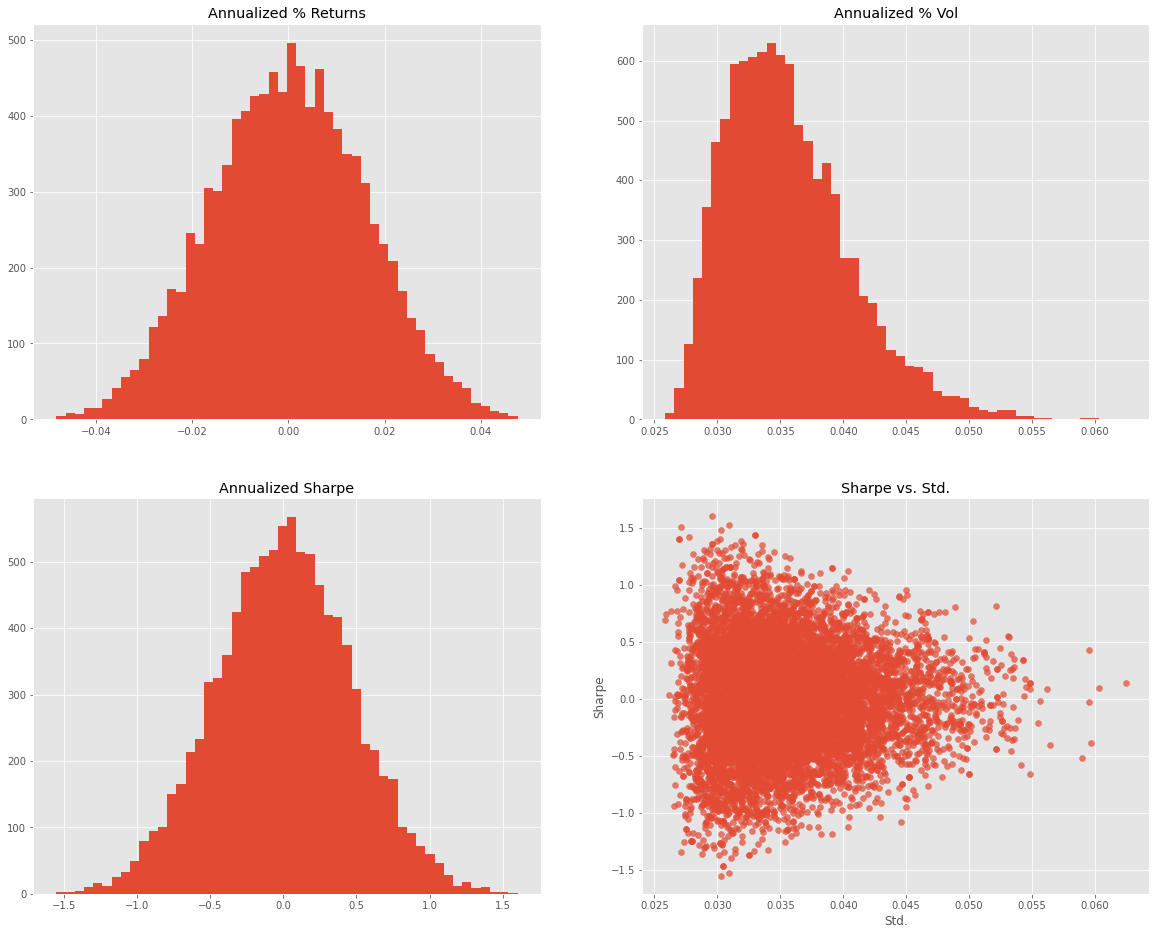

In [568]:
plot_hists2(d_ret)

# All Possible -1,1 combinations

In [573]:
# choose 1,000 random days with replacement or All days
# use all possible 1 or -1 weight combinations

choice = np.random.choice(range(len(df3)),1000)
days = df3.iloc[choice,:].to_numpy()

num  = df3.shape[1]
all_pos = np.array(np.meshgrid(*[[-1,1]]*num,indexing='ij')).reshape(num,-1)

# d_ret = (days.dot(all_pos))/days.shape[1]
d_ret = df3.to_numpy().dot(all_pos)/days.shape[1] # use all days

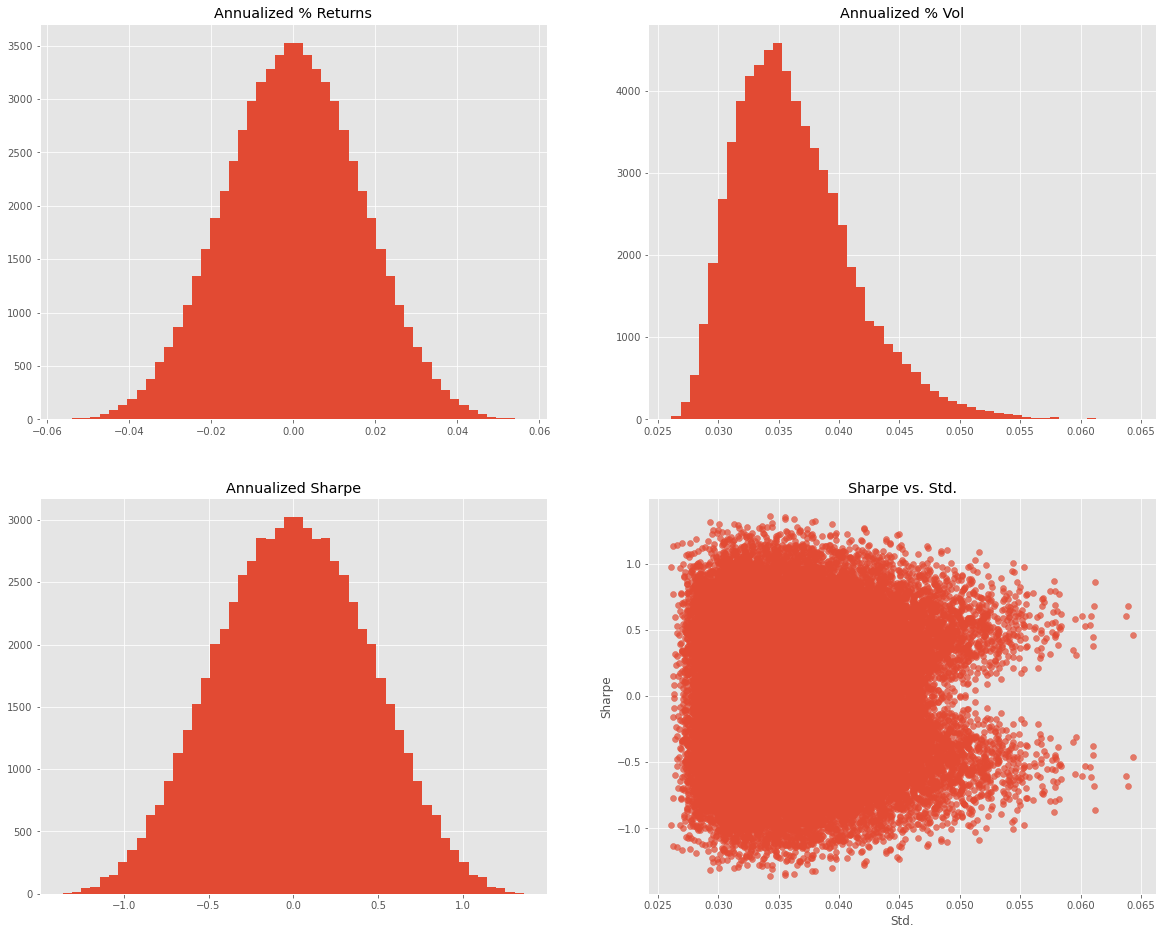

In [574]:
plot_hists2(d_ret)

# Correlation impact on variance reduction for multiple assets

In [521]:
def var_cor(n, p):

    # equal weight zero correlation
    n_assets = n
    Astd = .15 # std for all assets
    p = p
    cov_m = np.full((n_assets,n_assets),p*np.sqrt((Astd**2)**2))
#     cov_m = np.random.normal(p*np.sqrt((Astd**2)**2),.001,size=(n_assets,n_assets))
#     cov_m = cov_m + cov_m.T - np.diag(np.diag(cov_m))
    np.fill_diagonal(cov_m,Astd**2)
    # cov_m = np.eye(n_assets)*(Astd**2)
    wts = np.ones(n_assets)/n_assets
#     print(cov_m)

    return np.sqrt(wts.dot(cov_m).dot(wts.T))

In [522]:
var_cor(15,.16)

0.0697137002317335

<ipython-input-493-f3f2ad89deeb>:15: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(wts.dot(cov_m).dot(wts.T))
<ipython-input-493-f3f2ad89deeb>:15: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(wts.dot(cov_m).dot(wts.T))
<ipython-input-493-f3f2ad89deeb>:15: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(wts.dot(cov_m).dot(wts.T))
<ipython-input-493-f3f2ad89deeb>:15: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(wts.dot(cov_m).dot(wts.T))
<ipython-input-493-f3f2ad89deeb>:15: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(wts.dot(cov_m).dot(wts.T))
<ipython-input-493-f3f2ad89deeb>:15: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(wts.dot(cov_m).dot(wts.T))


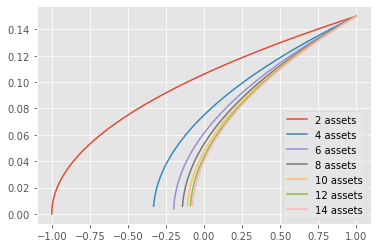

In [494]:
for n in range(2,16,2):
    plt.plot(np.linspace(-1,1,1000),[var_cor(n,i) for i in np.linspace(-1,1,1000)],label='{} assets'.format(n))
plt.legend()